> While in today’s computer chips, multiplication takes about the same number of cycles as addition

Wait. In that case, why do we care?
Same number of cycles, isnt the same as having the same computational cost!?
Also, does Strassens algol mmake it more parallelisable?


* http://www.theoryofcomputing.org/articles/gs005/gs005.pdf
* https://en.wikipedia.org/wiki/Bilinear_map
* https://arxiv.org/abs/1011.1350

In [1]:
import numpy as np
import numpy.random as rnd

import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx

In [2]:
# want to convert this into fast numerical code using cuda or similar!! -- http://cython.org/
# count how many times we mul
# would be cooler to overload multiplication?

In [3]:
def count(fn):  # not quite idea, want it to reset after every top level call
    counter = 0
    
    def wrapper(*args, **kwargs):
        wrapper.called += 1
        return fn(*args, **kwargs)
    
    wrapper.called = counter
    wrapper.__name__ = fn.__name__
    return wrapper

def split(matrix):  # split matrix into quarters
    row, col = matrix.shape
    m11 = matrix[:row//2, :col//2]  # top left
    m12 = matrix[:row//2, col//2:]  # top right
    m21 = matrix[row//2:, :col//2]  # bottom left
    m22 = matrix[row//2:, col//2:]  # bottom right
    return m11, m12, m21, m22

def merge(c11, c12, c21, c22):
    return np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22)))) 

@count
def strassen(a, b):
    """
    For the matrix multiplication of any two matrices of 
    size (n x n), they can be viewed as a 2x2 
    matrices of 4 elements each. 
    
    [[A_11, A_12],
     [A_21, A_22]]
     
    [[B_11, B_12],
     [B_21, B_22]]
    
    Where these elements are in in some other set.
    As long as those elements have addition and 
    multiplication defined then we can reduce the 
    
    """
    if len(a) == 2:  
        # base case: 2x2 matrix
        # use regular multiplication
        # as the elements are in the reals
        mul = np.multiply 
    else:
        # else use strassens algol as the elements
        # are in the general linear group
        mul = strassen
        
    a11, a12, a21, a22 = split(a)
    b11, b12, b21, b22 = split(b)

    p1 = mul(a11 + a22, b11 + b22)
    p2 = mul(a21 + a22, b11)
    p3 = mul(a11, b12 - b22)
    p4 = mul(a22, - b11 + b21)
    p5 = mul(a11 + a12, b22)
    p6 = mul(- a11 + a21, b11 + b12)
    p7 = mul(a12 - a22, b21 + b22)

    c11 = p1 + p4 - p5 + p7
    c12 = p3 + p5
    c21 = p2 + p4
    c22 = p1 - p2 + p3 + p6

    return merge(c11, c12, c21, c22)

In [ ]:
# TODO is it possible to write out the ps and cs in a matrix form?

In [4]:
def test(shape):
    A = rnd.random(shape)
    B = rnd.random(shape)
    C = strassen(A, B)
    C_ = np.dot(A, B)
    assert np.sum(np.abs(C - C_)) < 1e-8
    
test((32, 32))

[0.00000e+00 0.00000e+00 8.00000e+00 5.70000e+01 4.00000e+02 2.80100e+03
 1.96080e+04 1.37257e+05]


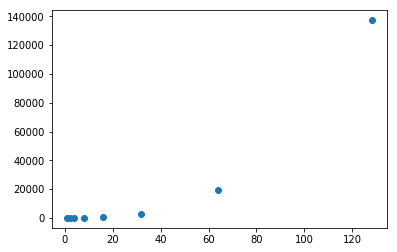

In [5]:
calls = np.zeros(8)
for i in range(2, len(calls)):
    strassen.called = 0
    test((2**i,2**i))
    calls[i] = strassen.called
    
plt.scatter(2**np.arange(8), calls)
# plt.plot(range(8))
print(calls)

In [6]:
def time(shape):
    A = rnd.random(shape)
    B = rnd.random(shape)
    %timeit C = strassen(A, B)
    %timeit C_ = np.dot(A, B)
time((16,16))

8.95 ms ± 97.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.1 µs ± 16.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [7]:
# HA. that is slow...
# Also profile vanilla matmul.

A cool perspective that isnt the natural way to consider tensors.
The elements of my matrix, are matrices. This makes sense if we just think of the elements of a matrix as any ring/field.

What about an extension to higher dimensional arrays?
For a 3-tensor, we would have a cube that gets split up into 8 smaller cubes?

__Wait, but why?!__ 

Why is strassen faster? What intution is there for where the algol comes from, seems rather unusual...

Simple, it uses less multiplications. Yes, but why is that possible?



[Fast Feasible and Unfeasible Matrix Multiplication Victor](?)